<a href="https://colab.research.google.com/github/iamdanialkamali/ImbalancedLittleData/blob/master/ImbalancedLittleDataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hazm
!pip install parsivar
!pip install bert-for-tf2
!pip install Unidecode
!pip install transformers

import hazm
import parsivar

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model


Processing /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c/nltk-3.3-cp36-none-any.whl
ERROR: parsivar 0.2.3 has requirement nltk==3.4.5, but you'll have nltk 3.3 which is incompatible.
  Found existing installation: nltk 3.4.5
    Uninstalling nltk-3.4.5:
      Successfully uninstalled nltk-3.4.5


Processing /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483/nltk-3.4.5-cp36-none-any.whl
ERROR: hazm 0.7.0 has requirement nltk==3.3, but you'll have nltk 3.4.5 which is incompatible.
  Found existing installation: nltk 3.3
    Uninstalling nltk-3.3:
      Successfully uninstalled nltk-3.3


In [ ]:
seed_value= 77

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session


In [ ]:
file = open('./sentiment.txt')
raw_input_data = file.readlines()

In [ ]:
labels = []
string_datas = []
for raw_data in  raw_input_data:
  string_data, label = raw_data.split("\";\"")
  labels.append(label.strip())
  string_datas.append(string_data.strip())

df = pd.DataFrame(list(zip( labels,string_datas)), 
               columns =[ 'label','text']) 
df.head()

,label,text
0,pos,من با خانواده ام 4 شب در هتل داریوش اقامت داشت...
1,pos,من به همراه همسرم و پسر و مادرم شهریور به مدت ...
2,pos,اتاق ما بزرگی اش خوب بود .کیفیت غذای رستوران خ...
3,pos,در تاریخ 23 لغایت 27 مرداد94 به مدت چهار روز ب...
4,pos,سلام من و خانواده ام در مرداد 94 درهتل داریوش ...


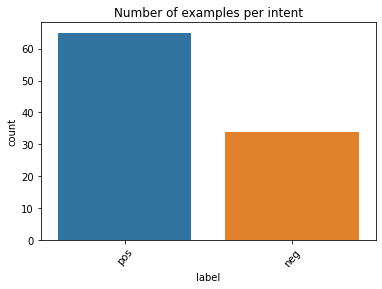

In [ ]:
chart = sns.countplot(df.label)
plt.title("Number of examples per intent")
chart.set_xticklabels(chart.get_xticklabels(),Rotation = 50)
plt.show()

text quality is poor

In [ ]:
# len(hazm.Normalizer().normalize(sample).split())

In [ ]:
# len(parsivar.Normalizer().normalize(hazm.Normalizer().normalize(sample)).split())

In [ ]:
# a = zip(hazm.Normalizer().normalize(sample).split(),parsivar.Normalizer().normalize(sample).split()+[0]*12)
# for x in a:
#   print(x)


### HAZM looks better

In [ ]:
import string
from unidecode import unidecode
def remove_punctuation(text):
    # text = unidecode(text)
    # text = parsivar.SpellCheck().spell_corrector(text)
    return text.translate(str.maketrans('', '', string.punctuation))

def mysplit(s):
    head = s.rstrip('0123456789')
    tail = s[len(head):]
    s = " ".join([head, tail])
    head = s.rstrip('۰۱۲۳۴۵۶۷۸۹')
    tail = s[len(head):]
    s = " ".join([head, tail])
    return s

def check_sticked(data):
  return " ".join(list(map(mysplit,data.split())))

df['normalized'] = df['text'].apply(check_sticked)
df['normalized'] = df['normalized'].apply(hazm.Normalizer().normalize)
df['normalized'] = df['normalized'].apply(remove_punctuation)

df.head()

,label,text,normalized
0,pos,من با خانواده ام 4 شب در هتل داریوش اقامت داشت...,من با خانواده‌ام ۴ شب در هتل داریوش اقامت داشت...
1,pos,من به همراه همسرم و پسر و مادرم شهریور به مدت ...,من به همراه همسرم و پسر و مادرم شهریور به مدت ...
2,pos,اتاق ما بزرگی اش خوب بود .کیفیت غذای رستوران خ...,اتاق ما بزرگی اش خوب بود کیفیت غذای رستوران خو...
3,pos,در تاریخ 23 لغایت 27 مرداد94 به مدت چهار روز ب...,در تاریخ ۲۳ لغایت ۲۷ مرداد ۹۴ به مدت چهار روز ...
4,pos,سلام من و خانواده ام در مرداد 94 درهتل داریوش ...,سلام من و خانواده‌ام در مرداد ۹۴ درهتل داریوش ...


In [ ]:
!wget https://raw.githubusercontent.com/NeelShah18/emot/master/emot/emo_unicode.py

--2020-09-11 17:31:42--  https://raw.githubusercontent.com/NeelShah18/emot/master/emot/emo_unicode.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159798 (156K) [text/plain]
Saving to: ‘emo_unicode.py.14’

emo_unicode.py.14   100%[===================>] 156.05K  --.-KB/s    in 0.03s   

2020-09-11 17:31:42 (5.89 MB/s) - ‘emo_unicode.py.14’ saved [159798/159798]



In [ ]:
from emo_unicode import *
import re

In [ ]:
def convert_emoticons(text):
    for emot in EMOTICONS:
      try:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
      except:
        pass
    return text

df['normalized'] = df['normalized'].apply(convert_emoticons)
df.head()

,label,text,normalized
0,pos,من با خانواده ام 4 شب در هتل داریوش اقامت داشت...,من با خانواده‌ام ۴ شب در هتل داریوش اقامت داشت...
1,pos,من به همراه همسرم و پسر و مادرم شهریور به مدت ...,من به همراه همسرم و پسر و مادرم شهریور به مدت ...
2,pos,اتاق ما بزرگی اش خوب بود .کیفیت غذای رستوران خ...,اتاق ما بزرگی اش خوب بود کیفیت غذای رستوران خو...
3,pos,در تاریخ 23 لغایت 27 مرداد94 به مدت چهار روز ب...,در تاریخ ۲۳ لغایت ۲۷ مرداد ۹۴ به مدت چهار روز ...
4,pos,سلام من و خانواده ام در مرداد 94 درهتل داریوش ...,سلام من و خانواده‌ام در مرداد ۹۴ درهتل داریوش ...


In [ ]:
from sklearn.utils import shuffle
import random
def tokenize(text):
    '''text: list of text documents'''
    tokenized =  parsivar.Tokenizer().tokenize_sentences(text)
    return tokenized


def augment(data,rate):
  augmented = []
  reps=[]
  for ng_rev in data:
      tok = tokenize(ng_rev)
      shuffled= [tok]
      for i in range(rate):
          random.shuffle(shuffled[-1])
          newl=list(shuffled[-1])
          shuffled.append(newl)
      for k in shuffled:
          s = ' '
          new_rev = s.join(k)
          if new_rev not in augmented:
              augmented.append(new_rev)
          else:
              reps.append(new_rev)
  return augmented
neg = [x[1] for x in filter(lambda x: x[0]=='neg',df.values)]
pos = [x[1] for x in filter(lambda x: x[0]=='pos',df.values)]
neg = augment(neg[10:],11)
neg_val = augment(neg[:10],5)
pos = augment(pos[10:],5)
pos_val = augment(pos[:10],5)
print(len(pos))
print(len(pos_val))
print(len(neg))
print(len(neg_val))
shuffle_x, shuffle_y = shuffle(["pos"]*len(pos)+["neg"]*len(neg),pos+neg)
df = pd.DataFrame(list(zip( shuffle_x, shuffle_y)), 
               columns =[ 'label','normalized'])
 

df_val = pd.DataFrame(list(zip(  *shuffle(["pos"]*len(pos_val)+["neg"]*len(neg_val),pos_val+neg_val))), 
               columns =[ 'label','normalized']) 


188
50
169
50


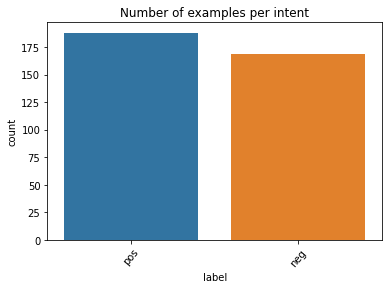

In [ ]:
chart = sns.countplot(df.label)
plt.title("Number of examples per intent")
chart.set_xticklabels(chart.get_xticklabels(),Rotation = 50)
plt.show()

In [ ]:
from transformers import AutoConfig, AutoTokenizer, TFAutoModel

config = AutoConfig.from_pretrained("HooshvareLab/bert-fa-base-uncased-sentiment-deepsentipers-binary")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased-sentiment-deepsentipers-binary")


In [ ]:
# tokenized_strings = list(map(parsivar.Tokenizer().tokenize_words,normalized_strings))
# df['normalized'] = df['normalized'].apply(parsivar.Tokenizer().tokenize_words)
encoded = tokenizer.batch_encode_plus(
  list(df['normalized'].values),
  add_special_tokens=True,
  max_length=500,
  return_token_type_ids=True,
  pad_to_max_length=True,
  return_attention_mask=True,
)
for x in encoded.keys():
  encoded[x] = np.array(encoded[x])

encoded_val = tokenizer.batch_encode_plus(
  list(df_val['normalized'].values),
  add_special_tokens=True,
  max_length=500,
  return_token_type_ids=True,
  pad_to_max_length=True,
  return_attention_mask=True,
)
for x in encoded_val.keys():
  encoded_val[x] = np.array(encoded_val[x])
# print(len(encoding[1]))
# df.head()
encoded_val.keys()

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitely activated but `max_length` is provided a specific value, please use

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
# def stem(text):
#     """custom function to remove the punctuation"""
#     # text = list(map(parsivar.FindStems().convert_to_stem,text))
#     stemmed_sample = np.array(list(map(hazm.Stemmer().stem,text)))
#     return stemmed_sample

# df['tokenized'] = df['tokenized'].apply(stem)
# tokenized_strings = np.array(list(map(stem,tokenized_strings)))
# df.head()
# ['input_ids'] = np.array(encoded['input_ids'])
# df['attention_mask'] = np.array(encoded['attention_mask'])
final_doc = pd.DataFrame(list(zip( shuffle_x, shuffle_y,np.array(encoded['input_ids']),np.array(encoded['attention_mask']))), 
               columns =[ 'label','normalized','input_ids','attention_mask']) 
final_doc.head()

,label,normalized,input_ids,attention_mask
0,pos,از لحاظ نزدیکی به ساحل و دریا هم عالیه و به ...,"[2, 2791, 4817, 5483, 2789, 6432, 1379, 3330, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,neg,دستشوی کثیف بود در مورد تور های مجانی مربوط ب...,"[2, 14144, 2824, 16066, 2834, 2786, 3050, 3863...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,neg,در خصوص هتل داریوش به موارد زیر اشاره می کنم ...,"[2, 2786, 3519, 5335, 8985, 2789, 3907, 3150, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,pos,ولی در کل نمره بسیار خوب میگیره این بوفه ( 8 ا...,"[2, 3362, 2786, 3142, 10105, 3177, 4124, 35814...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,pos,هتل داریوش بسیار زیبا و مجلل بود نمیشه گفت ای...,"[2, 5335, 8985, 3177, 5170, 1379, 17254, 2834,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
final_doc.to_csv("coded_data.csv")

In [ ]:
!wget https://raw.githubusercontent.com/kharazi/persian-stopwords/master/persian

--2020-09-11 17:31:46--  https://raw.githubusercontent.com/kharazi/persian-stopwords/master/persian
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14252 (14K) [text/plain]
Saving to: ‘persian.10’

persian.10          100%[===================>]  13.92K  --.-KB/s    in 0.006s  

2020-09-11 17:31:46 (2.17 MB/s) - ‘persian.10’ saved [14252/14252]



In [ ]:
# STOPWORDS = set(map(str.strip,open('./persian').readlines()))
# def remove_stopwords(text):
#     """custom function to remove the stopwords"""
#     return np.array([word for word in text if word not in STOPWORDS])
    
# df['tokenized'] = df['tokenized'].apply(remove_stopwords)
# df.head()

In [ ]:
# tokenizer.

# encoding = tokenizer.padencode_plus(
#   review,
#   add_special_tokens=True,
#   max_length=500,
#   return_token_type_ids=False,
#   pad_to_max_length=True,
#   return_attention_mask=True,
# )

# encoded_texts = np.array(list(map(tokenizer.convert_tokens_to_ids,df['tokenized'].values)))
# df['encoded_text'] = df['tokenized'].apply(tokenizer.convert_tokens_to_ids)

# encoded_texts = np.array(list(map(tokenizer.convert_tokens_to_ids,df['encoded_text'].values)))
# encoded_texts = np.array(list(map(tokenizer.pad,df['tokenized'].values)))


df.head()

,label,normalized
0,pos,از لحاظ نزدیکی به ساحل و دریا هم عالیه و به ...
1,neg,دستشوی کثیف بود در مورد تور های مجانی مربوط ب...
2,neg,در خصوص هتل داریوش به موارد زیر اشاره می کنم ...
3,pos,ولی در کل نمره بسیار خوب میگیره این بوفه ( 8 ا...
4,pos,هتل داریوش بسیار زیبا و مجلل بود نمیشه گفت ای...


In [ ]:
# df['encoded_text'].values.shape

In [ ]:
# np.array(encoded_texts[1]).shape

In [ ]:
ll = ['pos', 'neg']
encoded_labels = np.array(list(map(lambda d : [1,0] if d =='pos' else [0,1],df.label.values)))
encoded_labels_val = np.array(list(map(lambda d : [1,0] if d =='pos' else [0,1],df_val.label.values)))

In [ ]:
# print(np.array(df.encoded_text.values))
# encoded_labels =  tf.convert_to_tensor(np.array(list(map(lambda d : np.array([1,0]) if d =='pos' else np.array([0,1]),df.label.values))))
# encoded_texts =  tf.convert_to_tensor(np.array(df['encoded_text'].values))
# for x in df.encoded_text.values:
#   print(x.shape)
# print(encoded_texts.shape)
# encoded_texts = encoded_texts.reshape((99,500,...))

In [ ]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
bert_model = TFAutoModel.from_pretrained("HooshvareLab/bert-fa-base-uncased-sentiment-deepsentipers-binary")
bert_model.trainable = False
bert_model.summary()


Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased-sentiment-deepsentipers-binary were not used when initializing TFBertModel: ['dropout_37', 'classifier']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased-sentiment-deepsentipers-binary.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  162841344 
Total params: 162,841,344
Trainable params: 0
Non-trainable params: 162,841,344
_________________________________________________________________


In [ ]:
# encoded_bert_data = bert_model(encoded.values())


In [ ]:
# !pip install imbalanced-learn

In [ ]:
# from imblearn.over_sampling import SVMSMOTE,RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# over = SVMSMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over)]
# pipeline = Pipeline(steps=steps)
# X, y = pipeline.fit_resample(encoded_bert_data[1].numpy(), np.array([1 if x =="pos" else 0 for x in labels]))

In [ ]:
max_len = 500
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import  tensorflow
def create_model():
    ## BERT encoder
    # encoder = TFBertModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

    input_ids = layers.Input(shape=(max_len,), dtype=tf.int32)
    input_mask = layers.Input(shape=(max_len,), dtype=tf.int32)
    input_types = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding = bert_model([input_ids,input_mask,input_types])
    # print(embedding[1].shape)
    # print(embedding[0].shape)
    # print(embedding[1].shape)
    end_logits = layers.Dense(200)(embedding[1])
    # end_logits = layers.Conv1D(128,10)(embedding[0])
    # end_logits = layers.Conv1D(64,10)(end_logits)
    # end_logits = layers.Conv1D(32,10)(end_logits)
    # end_logits = layers.Conv1D(20,10)(end_logits)
    # end_logits = layers.Conv1D(20,10)(end_logits)
    # end_logits = layers.LSTM(400)(end_logits)
    # end_logits = layers.BatchNormalization()(end_logits)
    # end_logits = layers.Dense(200)(end_logits)
    # end_logits = layers.BatchNormalization()(end_logits)
    # end_logits = layers.Dense(200)(end_logits)
    # end_logits = layers.BatchNormalization()(end_logits)
    # end_logits = layers.Dense(200,)(end_logits)
    # end_logits = layers.BatchNormalization()(end_logits)
    end_logits = layers.Dense(200,'relu',kernel_regularizer=regularizers.l2(1e-4))(end_logits)
    end_logits = layers.Dense(200,'relu')(end_logits)
    end_logits = layers.Dense(200,'relu',kernel_regularizer=regularizers.l2(1e-4))(end_logits)
    end_logits = layers.Dense(200,'relu')(end_logits)
    end_logits = layers.Dense(200,'relu',kernel_regularizer=regularizers.l2(1e-4))(end_logits)
    end_logits = layers.Dense(150,'relu')(end_logits)
    end_logits = layers.Dense(100,'relu',kernel_regularizer=regularizers.l2(1e-4))(end_logits)
    end_logits = layers.Dropout(0.5)(end_logits)
    end_logits = layers.Dense(80,'relu',kernel_regularizer=regularizers.l2(1e-4))(end_logits)    
    end_logits = layers.Dropout(0.5)(end_logits)
    end_logits = layers.Dense(50,'relu',kernel_regularizer=regularizers.l2(1e-4))(end_logits)
    end_probs = layers.Dense(2,'softmax')(end_logits)

    model = tensorflow.keras.Model(
        inputs=[input_ids,input_mask,input_types],
        outputs=[end_probs],
    )
    model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(1e-5),
    loss = tensorflow.keras.losses.BinaryCrossentropy(),
    metrics=['acc',f1_m,precision_m, recall_m]
  )
    return model


In [ ]:
from sklearn.model_selection import KFold
model = create_model()
model.summary()


Model: "functional_63"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_109 (InputLayer)          [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_110 (InputLayer)          [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_111 (InputLayer)          [(None, 500)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_6 (TFBertModel)   ((None, 500, 768), ( 162841344   input_109[0][0]                  
                                                                 input_110[0][0]      

In [ ]:
acc_per_fold = []
loss_per_fold = []
fold_no = 1
for train,test in KFold(10).split(encoded['input_ids'],encoded_labels):
  model = create_model()
  baseline = len(list(filter(lambda x: bool(x[1] == 1) ,encoded_labels[train])))/len(encoded_labels[train])
  print(max([baseline,1-baseline]))
  history = model.fit(
  x = [encoded['input_ids'][train],encoded['token_type_ids'][train],encoded['attention_mask'][train]],
  epochs = 200,
  y = encoded_labels[train],
  batch_size = 10,validation_data=( [encoded_val['input_ids'],encoded_val['token_type_ids'],encoded_val['attention_mask']],encoded_labels_val)
  )
  baseline = len(list(filter(lambda x: bool(x[1] == 1) ,encoded_labels[test])))/len(encoded_labels[test])
  print(max([baseline,1-baseline]))
  scores = model.evaluate([encoded['input_ids'][test],encoded['token_type_ids'][test],encoded['attention_mask'][test]], encoded_labels[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

0.5233644859813085
Epoch 1/200
33/33 [==============================] - 21s 648ms/step - loss: 0.7841 - acc: 0.4206 - f1_m: 0.4091 - precision_m: 0.4091 - recall_m: 0.4091 - val_loss: 0.7776 - val_acc: 0.5000 - val_f1_m: 0.5000 - val_precision_m: 0.5000 - val_recall_m: 0.5000
Epoch 2/200
33/33 [==============================] - 20s 609ms/step - loss: 0.7779 - acc: 0.4953 - f1_m: 0.5091 - precision_m: 0.5091 - recall_m: 0.5091 - val_loss: 0.7729 - val_acc: 0.5000 - val_f1_m: 0.5000 - val_precision_m: 0.5000 - val_recall_m: 0.5000
Epoch 3/200
33/33 [==============================] - 19s 584ms/step - loss: 0.7745 - acc: 0.5296 - f1_m: 0.5152 - precision_m: 0.5152 - recall_m: 0.5152 - val_loss: 0.7683 - val_acc: 0.5000 - val_f1_m: 0.5000 - val_precision_m: 0.5000 - val_recall_m: 0.5000
Epoch 4/200
33/33 [==============================] - 19s 579ms/step - loss: 0.7726 - acc: 0.5202 - f1_m: 0.5333 - precision_m: 0.5333 - recall_m: 0.5333 - val_loss: 0.7636 - val_acc: 0.5200 - val_f1_m: 0.520

In [ ]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['val_acc','acc'])
plt.show()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val_loss','loss'])
plt.show()